## EDA and Pre Processing of Data

In [1]:
#import statements for libraries are written here. The import statments inlcuded here are specifically for EDA and Cleansing action.
# the rest would have been imported as and when required.

# import of generic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re
from sklearn.cluster import KMeans
from textblob import TextBlob, Word, Blobber
import sys
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#extended list - can add relevant stop words to this list and can add as an extended functionality
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)


# spacy import for NER and other usages 
import spacy
nlp = spacy.load('en')

# NLTK import for word stemming and lemmatiazation. The list of all the english words is loaded here.
import nltk
words = set(nltk.corpus.words.words())
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [148]:
#import Modelling libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,Flatten, SpatialDropout1D,Dropout, Conv1D, GlobalMaxPooling1D, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras import optimizers
import re
from sklearn.metrics import confusion_matrix

In [3]:
#import data set from the provided excel sheet. Also, will check if the data has been loaded correctly by head action
data_init = pd.read_excel('data.xlsx')
data_init.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


We can see that there are many special characters included in the data set like line breaks, new line breaks, brackets etc. We will take care of that while cleaning

In [4]:
#copy the original data to a new dataframe for all operations
data =  data_init.copy()
# checking for list of null values if any present in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8498 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.7+ KB


We could see that there are null values present in the 'Short description' and 'Description' columns. Checking for rows that have null values.

In [5]:
#check for null values
data[data.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0
7987,security incidents - (in33536629) : possible t...,NaN,gzhapcld fdigznbk,GRP_30


In [6]:
#if null replace with the other value. this ensures we dont lose data as datapoints for training are quite less
for index, row in data.iterrows():
    if (row['Short description'] is np.nan):
        row['Short description'] = row['Description']
    if (row['Description'] is np.nan):
        row['Description'] = row['Short description']
        

In [7]:
#check if any null values still exist.
data[data.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group


In [8]:
#top 10 most occurring statements in description column. 
n = 10
data['Description'].value_counts()[:n]

the                          56
windows password reset       29
password reset               26
account locked in ad         23
windows account locked       23
erp SID_34 account unlock    18
account locked.              17
unable to connect to vpn     17
account unlock               16
blank call                   15
Name: Description, dtype: int64

In [9]:
#top 10 most occurring statements in short description column
data['Short description'].value_counts()[:n]

password reset               38
windows password reset       29
account locked in ad         24
windows account locked       23
erp SID_34 account unlock    19
blank call                   18
unable to connect to vpn     18
account locked.              18
login issue                  18
account unlock               17
Name: Short description, dtype: int64

In [10]:
#top 10 most occurring assignment group
data['Assignment group'].value_counts()[:n]

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
Name: Assignment group, dtype: int64

About half of the data points are distributed across top 3 groups.

In [11]:
#least 10 occurring statements in description column
data['Assignment group'].value_counts()[::-1][:n]

GRP_70    1
GRP_73    1
GRP_64    1
GRP_35    1
GRP_61    1
GRP_67    1
GRP_72    2
GRP_69    2
GRP_71    2
GRP_57    2
Name: Assignment group, dtype: int64

On manual analysis, it was found that there is a great similarity between description and short description columns. If the similarity score is greater than 0.7, we can clearly assume that they are same and either of one only can be used to be analyzed for classifying the group.

In [13]:
#function to calculate similarity scores. 
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]


def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [14]:
#calculate simialrity score
similarity_score_list = []
data = data.replace(np.nan, '', regex=True)
for index, row in data.iterrows():
    try :
        similarity_score_list.append(cosine_sim(row['Short description'],row['Description']))
    except:
        similarity_score_list.append(0.0)

F:\Softwares\Python\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_word

In [15]:
#appending the similarity score to the list. 
data['similarity_score'] = similarity_score_list

In [16]:
#most occuring similairty score rounded to 6 digits
data['similarity_score'].round(6).value_counts()

1.000000    2976
0.776515     790
0.000000     603
0.579739     185
0.449436      37
0.379978      34
0.410363      26
0.709297      25
0.656973      25
0.747407      23
0.634809      23
0.335176      22
0.482680      22
0.290321      21
0.194314      20
0.502329      19
0.818180      19
0.447632      17
0.799519      16
0.422234      16
0.260556      16
0.259698      16
0.355477      16
0.243956      16
0.303216      15
0.278943      15
0.133785      14
0.161714      14
0.150557      14
0.127259      13
            ... 
0.283321       1
0.553516       1
0.273776       1
0.809550       1
0.435199       1
0.406295       1
0.062949       1
0.406623       1
0.225660       1
0.075381       1
0.522368       1
0.382890       1
0.217261       1
0.752897       1
0.419887       1
0.106846       1
0.025184       1
0.124847       1
0.121387       1
0.367821       1
0.176746       1
0.222791       1
0.315417       1
0.255478       1
0.509879       1
0.075755       1
0.316901       1
0.293098      

In [17]:
#regex for cleaning the data ..add the relevant regex patterns and functions here. need to removed non english words as well
import re
_digits = re.compile('\d')
def contains_digits(d):
    return bool(_digits.search(d))


regex_desc = []

for i in data['Description']:
    new_str = []
    i = re.sub("[^\x20-\x7E]", "", i)  #removes non printable
    i = re.sub("\S*@\S*\s?"," TAGEMAIL ",i) #removes email id ##instead of removing email id entirely, tag the data 
    i = i.replace('\r\n',' ') #removes line breaks patterns
    doc = nlp(i)
    for k in doc:
        j = str(k)
        if(k.ent_type_ == 'DATE' and contains_digits(k.text)): #removes the date as in digits and replaces them with date tag
            j = ' TAGDATE '
        new_str.append(j)
    i = ' '.join(new_str)
    i = re.sub('[^A-Za-z]+', ' ', i) #removes digits 
    i = i.replace('(\xa0)', ' ')  #removes pattern #remove english description or transalte- need to check
    if(i.startswith('received from')):
         i = i.replace('received from', '')
    i = i.replace('hi,',' ')
    i = i.replace('best',' ')
    i = i.replace('kind',' ')
    i = i.replace('hello,',' ')
    i = i.replace('good morning',' ')
    i = i.replace('morning', ' ')
    
                  
    regex_desc.append(i)
    
data['Description'] = regex_desc

In [18]:
regex_desc = []
for i in data['Short description']:
    new_str = []
    i = re.sub("[^\x20-\x7E]", "", i)  #removes non printable
    i = re.sub("\S*@\S*\s?"," TAGEMAIL ",i) #removes email id ##instead of removing email id entirely, tag the data 
    i = i.replace('\r\n',' ') #removes patterns
    doc = nlp(i)
    for k in doc:
        j = str(k)
        if(k.ent_type_ == 'DATE' and contains_digits(k.text)):
            j = ' TAGDATE '
        new_str.append(j)
    i = ' '.join(new_str)
    i = re.sub('[^A-Za-z]+', ' ', i) #removes digits 
    i = i.replace('(\xa0)', ' ')  #removes pattern #remove english description or transalte- need to check
    if(i.startswith('received from')):
         i = i.replace('received from', '')
    i = i.replace('hi,',' ')
    i = i.replace('best',' ')
    i = i.replace('kind',' ')
    i = i.replace('hello,',' ')
    i = i.replace('good morning',' ')
    i = i.replace('morning', ' ')
    
                  
    regex_desc.append(i)
    
data['Short description'] = regex_desc

In [19]:
# after cleansing data , checking the head of data set
data.head()

,Short description,Description,Caller,Assignment group,similarity_score
0,login issue,verified user details employee manager name c...,spxjnwir pjlcoqds,GRP_0,0.287656
1,outlook,TAGEMAIL team my meetings skype meetings etc ...,hmjdrvpb komuaywn,GRP_0,0.186811
2,ca nt log in to vpn,TAGEMAIL can not log on to vpn,eylqgodm ybqkwiam,GRP_0,0.449436
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,1.000000
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,1.000000


In [20]:
#relevant only for tf-idf vectorizer and visualization; not for LSTM. 
#currently the cleaned_Desc is applied on the description column. need to remove non english words as well.
stop = stopwords.words('english')
data['description_cleaned'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

,Short description,Description,Caller,Assignment group,similarity_score,description_cleaned
0,login issue,verified user details employee manager name c...,spxjnwir pjlcoqds,GRP_0,0.287656,verified user details employee manager name ch...
1,outlook,TAGEMAIL team my meetings skype meetings etc ...,hmjdrvpb komuaywn,GRP_0,0.186811,TAGEMAIL team meetings skype meetings etc appe...
2,ca nt log in to vpn,TAGEMAIL can not log on to vpn,eylqgodm ybqkwiam,GRP_0,0.449436,TAGEMAIL log vpn
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,1.000000,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,1.000000,skype error


In [27]:
#tf-idf vectorization
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features=5000)
tfs = tfidf_vect_ngram.fit(data['description_cleaned'])

In [28]:
#feature names
feature_names = tfidf_vect_ngram.get_feature_names()

In [29]:
#most occuring bi grams and trigrams from the data
feature_names

['ab awyl',
 'ab awyl via',
 'abended job',
 'abended job job',
 'able access',
 'able add',
 'able connect',
 'able connect vpn',
 'able enter',
 'able find',
 'able get',
 'able log',
 'able login',
 'able login ess',
 'able login ethics',
 'able login issue',
 'able open',
 'able print',
 'able resolve',
 'able resolve please',
 'able see',
 'able see emails',
 'able use',
 'able view',
 'aborted disk',
 'aborted disk agents',
 'aborted media',
 'aborted media agents',
 'absender und',
 'absender und lschen',
 'ac line',
 'accept impact',
 'accept impact flag',
 'access collaboration',
 'access collaboration platform',
 'access company',
 'access crm',
 'access data',
 'access data files',
 'access denied',
 'access drive',
 'access email',
 'access emails',
 'access engineering',
 'access engineering tool',
 'access erp',
 'access erp sid',
 'access folder',
 'access following',
 'access group',
 'access group acl',
 'access hostname',
 'access hr',
 'access hr tool',
 'access like

In [30]:
#description length calculation
len_desc = []
for desc in data['Description']:
    count = len(re.findall(r'\w+', desc))
    len_desc.append(count)
data['desc_length'] = len_desc

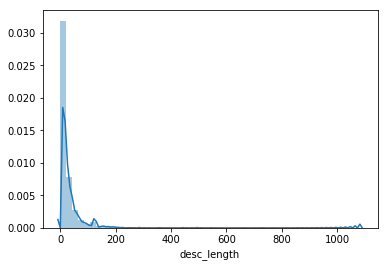

In [31]:
sns.distplot(data['desc_length'])

In [23]:
#value count for description length by number of words.
data['desc_length'].value_counts()[:20]

8     708
5     590
4     573
9     492
6     408
3     378
7     340
10    325
11    263
2     252
12    223
13    188
15    163
14    155
17    136
16    129
19    129
18    128
20    117
22    114
Name: desc_length, dtype: int64

In [24]:
#stats for description length
data['desc_length'].describe()

count    8500.000000
mean       25.339765
std        58.116804
min         0.000000
25%         6.000000
50%        11.000000
75%        26.000000
max      1339.000000
Name: desc_length, dtype: float64

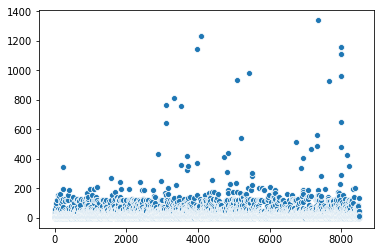

In [25]:
sns.scatterplot(data=data['desc_length'])

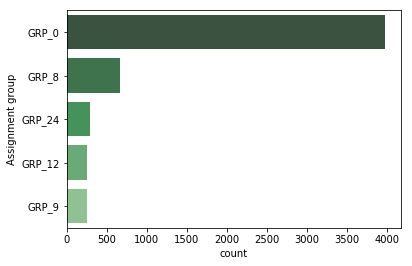

In [26]:
sns.countplot(y=data['Assignment group'], data=data, palette="Greens_d",
              order=data['Assignment group'].value_counts().iloc[:5].index)

In [27]:
#top n unigrams
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['description_cleaned'], 50)
df1 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
df1.groupby('Description').sum()['count'].sort_values(ascending=False)


Description
received     2367
yes          2018
na           1934
job          1763
please       1739
password     1325
erp          1182
user         1158
company      1133
tool         1011
scheduler     969
sid           951
access        946
ticket        920
failed        904
reset         833
issue         799
unable        779
error         711
account       692
site          691
name          652
power         637
id            626
help          609
hostname      605
system        599
circuit       577
working       550
email         546
vendor        532
login         528
need          523
outlook       522
network       509
backup        472
telecom       460
event         457
see           424
type          416
message       401
able          387
phone         386
inside        377
new           365
server        364
number        357
windows       331
team          329
check         327
Name: count, dtype: int64

In [28]:
#top n bi grams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['description_cleaned'], 30)
df3 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
df3.groupby('Description').sum()['count'].sort_values(ascending=False)

Description
yes na                    1570
job scheduler              969
failed job                 809
job failed                 476
received job               469
backup circuit             427
password reset             345
telecom vendor             301
erp sid                    293
type outage                286
scheduled maintenance      286
na yes                     285
na company                 285
circuit yes                242
yes yes                    233
engineering tool           230
collaboration platform     207
account locked             197
please help                186
asa deny                   185
acl inside                 185
access group               185
group acl                  185
inside dst                 185
src inside                 185
reset password             169
microsoft internet         168
browser microsoft          166
internet number            165
dst outside                164
Name: count, dtype: int64

In [29]:
# top Parts of Speech present
blob = TextBlob(str(data['description_cleaned']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df

NN     165
CD      62
JJ      59
VBD     23
NNS     19
NNP      7
VB       6
RB       5
VBN      5
VBG      5
VBZ      4
VBP      3
MD       2
DT       2
FW       1
JJS      1
Name: pos, dtype: int64

In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['description_cleaned'])

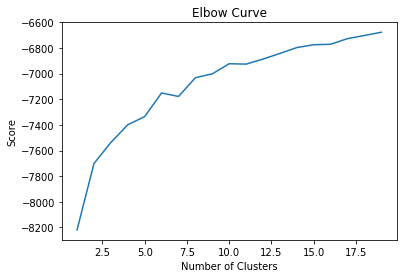

In [31]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### The graph above is an elbow graph for checking whether they can be fit into cluster model instead of assignment group. It seems the entire data set can be put into cluster size of between 4 and 7.

In [32]:
import spacy
nlp = spacy.load('en')

In [33]:
named_entity_len = []
named_entity_list = []
for i in data['description_cleaned']:
    doc = nlp(i)
    named_entity_len.append(len(doc.ents))
    named_entity_list.append(doc.ents)

In [34]:
data['named_entity'] = named_entity_list
data['named_entity_len'] = named_entity_len

In [35]:
for index, row in data.iterrows():
    if(row['named_entity_len']!=0):
        print(row['named_entity'])

(skype,)
(HostName company com value mountpoint, SID)
(login hr tool sgxqsuojr xwbesorf,)
(login company, tomorrow, month)
(erp SID,)
(helpdeski,)
(vpn pls check cc,)
(erp, SID)
(login hr,)
(login hr tool,)
(password reset collaboration,)
(hiplease reset,)
(two, one)
(erp SID,)
(seconds,)
(today, vendor pm usa, dkmcfreg anwmfvlgenkataramdntyana, today)
(login hr,)
(log hr tool,)
(password changed password management tool, erp)
(Job,)
(mm,)
(need password management tool password,)
(reset scm software,)
(morning,)
(need dn,)
(mm,)
(Job,)
(password, abc)
(two,)
(error login SID, tool pwd, erp)
(ekpo, ekpo, ekpo, ekpo kzvbr)
(Job,)
(Job,)
(Job,)
(Job,)
(user xyzuser,)
(lan user,)
(hr payroll na u failed,)
(hr payroll na u failed,)
(hr payroll na u failed,)
(na, na, na, na, na, na, na, na, verizon, gsc, na)
(na, na, na, na, na, na, vendor, gsc, na cert, na)
(Job,)
(erp SID,)
(tomorrow,)
(erp, handlereturnstructureorreturntableline jcoerpmanager java, java, java, bapi)
(bop,)
(Job,)
(mm, ro

In [36]:
data.groupby('Assignment group')['named_entity'].nunique()

Assignment group
GRP_0     1727
GRP_1       22
GRP_10      77
GRP_11      23
GRP_12     165
GRP_13     103
GRP_14      85
GRP_15      26
GRP_16      55
GRP_17      19
GRP_18      58
GRP_19      92
GRP_2      181
GRP_20      27
GRP_21      16
GRP_22      23
GRP_23      11
GRP_24     190
GRP_25      73
GRP_26      37
GRP_27      13
GRP_28      25
GRP_29      55
GRP_3       93
GRP_30       5
GRP_31      16
GRP_32       4
GRP_33      88
GRP_34      40
GRP_35       1
          ... 
GRP_49       6
GRP_5       51
GRP_50       7
GRP_51       7
GRP_52       9
GRP_53       7
GRP_54       2
GRP_55       5
GRP_56       3
GRP_57       2
GRP_58       3
GRP_59       6
GRP_6       41
GRP_60       6
GRP_61       1
GRP_62      16
GRP_63       3
GRP_64       1
GRP_65       8
GRP_66       3
GRP_67       1
GRP_68       2
GRP_69       2
GRP_7       34
GRP_70       1
GRP_71       2
GRP_72       1
GRP_73       1
GRP_8      303
GRP_9       50
Name: named_entity, Length: 74, dtype: int64

In [37]:
data.head()

,Short description,Description,Caller,Assignment group,similarity_score,description_cleaned,desc_length,named_entity,named_entity_len
0,login issue,verified user details employee manager name c...,spxjnwir pjlcoqds,GRP_0,0.287656,verified user details employee manager name ch...,33,(),0
1,outlook,received from team my meetings skype meetings ...,hmjdrvpb komuaywn,GRP_0,0.186811,received team meetings skype meetings etc appe...,24,(),0
2,cant log in to vpn,received from cannot log on to vpnbest,eylqgodm ybqkwiam,GRP_0,0.449436,received cannot log vpnbest,7,(),0
3,unable to access hr_tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,1.000000,unable access hr tool page,6,(),0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,1.000000,skype error,2,"((skype),)",1


In [38]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data_dl = data['Description'].values.tolist()
data_words = list(sent_to_words(data_dl))
print(data_words[:1])

[['verified', 'user', 'details', 'employee', 'manager', 'name', 'checked', 'the', 'user', 'name', 'in', 'ad', 'and', 'reset', 'the', 'password', 'advised', 'the', 'user', 'to', 'login', 'and', 'check', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']]


## Topic Modelling using Gensim - LDA

In [39]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    #preprocessing the data
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed description Data

In [40]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [41]:
pprint(lda_model.print_topics())

[(0,
  '0.229*"job" + 0.203*"receive" + 0.086*"abended" + 0.078*"scheduler" + '
  '0.028*"team" + 0.024*"sid" + 0.019*"fail" + 0.011*"business" + 0.009*"cold" '
  '+ 0.008*"remove"'),
 (1,
  '0.059*"ticket" + 0.057*"company" + 0.048*"account" + 0.044*"email" + '
  '0.032*"work" + 0.027*"site" + 0.024*"update" + 0.024*"message" + '
  '0.023*"reset" + 0.021*"pc"'),
 (2,
  '0.019*"file" + 0.015*"outside" + 0.014*"device" + 0.013*"event" + '
  '0.012*"request" + 0.010*"view" + 0.010*"process" + 0.010*"follow" + '
  '0.010*"time" + 0.009*"information"'),
 (3,
  '0.053*"access" + 0.040*"user" + 0.038*"issue" + 0.033*"error" + '
  '0.030*"name" + 0.029*"change" + 0.028*"tool" + 0.026*"unable" + '
  '0.024*"password" + 0.021*"server"')]


In [42]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9531,"access, user, issue, error, name, change, tool...","[verify, user, name, check, user, name, ad, pa..."
1,1,0.0,0.6187,"job, receive, abended, scheduler, team, sid, f...","[receive, team, meeting, meeting, appear, cale..."
2,2,0.0,0.4886,"job, receive, abended, scheduler, team, sid, f...","[receive, log, vpnb]"
3,3,3.0,0.8500,"access, user, issue, error, name, change, tool...","[unable, access, tool, page]"
4,4,0.0,0.2500,"job, receive, abended, scheduler, team, sid, f...",[]
5,5,3.0,0.7341,"access, user, issue, error, name, change, tool...","[unable, log, engineering, tool, skype]"
6,6,1.0,0.5020,"ticket, company, account, email, work, site, u...","[com, datum, perpsr, psa]"
7,7,2.0,0.4677,"file, outside, device, event, request, view, p...","[ticket, employment, status, new, non, employe..."
8,8,3.0,0.4172,"access, user, issue, error, name, change, tool...","[unable, disable]"
9,9,1.0,0.8125,"ticket, company, account, email, work, site, u...","[ticket, update, inplant]"


### The data frame above shows example of 10 sentences with their respective topic idetified and their percentage contribution for the description

In [43]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9366,"job, receive, abended, scheduler, team, sid, fail, business, cold, remove","[receive, disk_agent, fail, agent, fail, job, sid, filesys, fail, job, scheduler]"
1,1.0,0.9722,"ticket, company, account, email, work, site, update, message, reset, pc","[type, specify, type, outage_top_cert, site, power, company, power, network, company, maint, pro..."
2,2.0,0.9480,"file, outside, device, event, request, view, process, follow, time, information","[configure, yesterday, outlook, version, earlier, old, new, version, instal, download, time, spe..."
3,3.0,0.9605,"access, user, issue, error, name, change, tool, unable, password, server","[login, issue, verify, user, name, check, user, name, ad, fine, advise, user, login, check, able..."


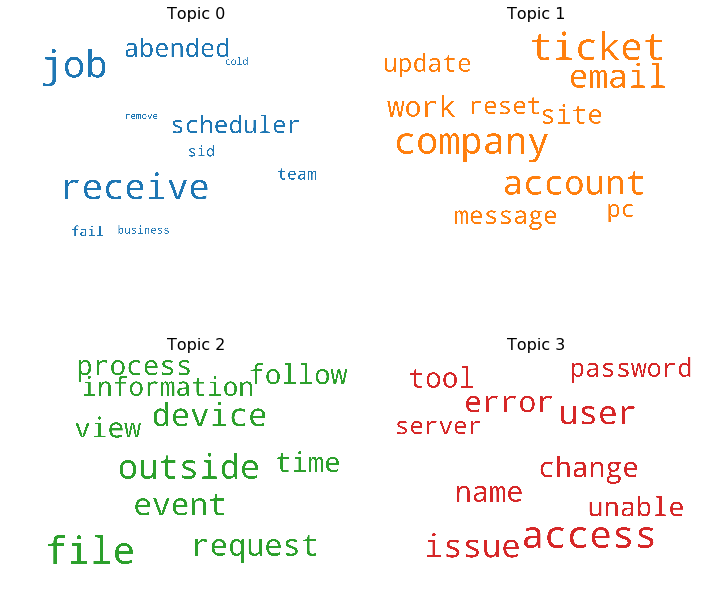

In [44]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


Wordcloud formed for each topic with the most frequently occurring word in each topic.

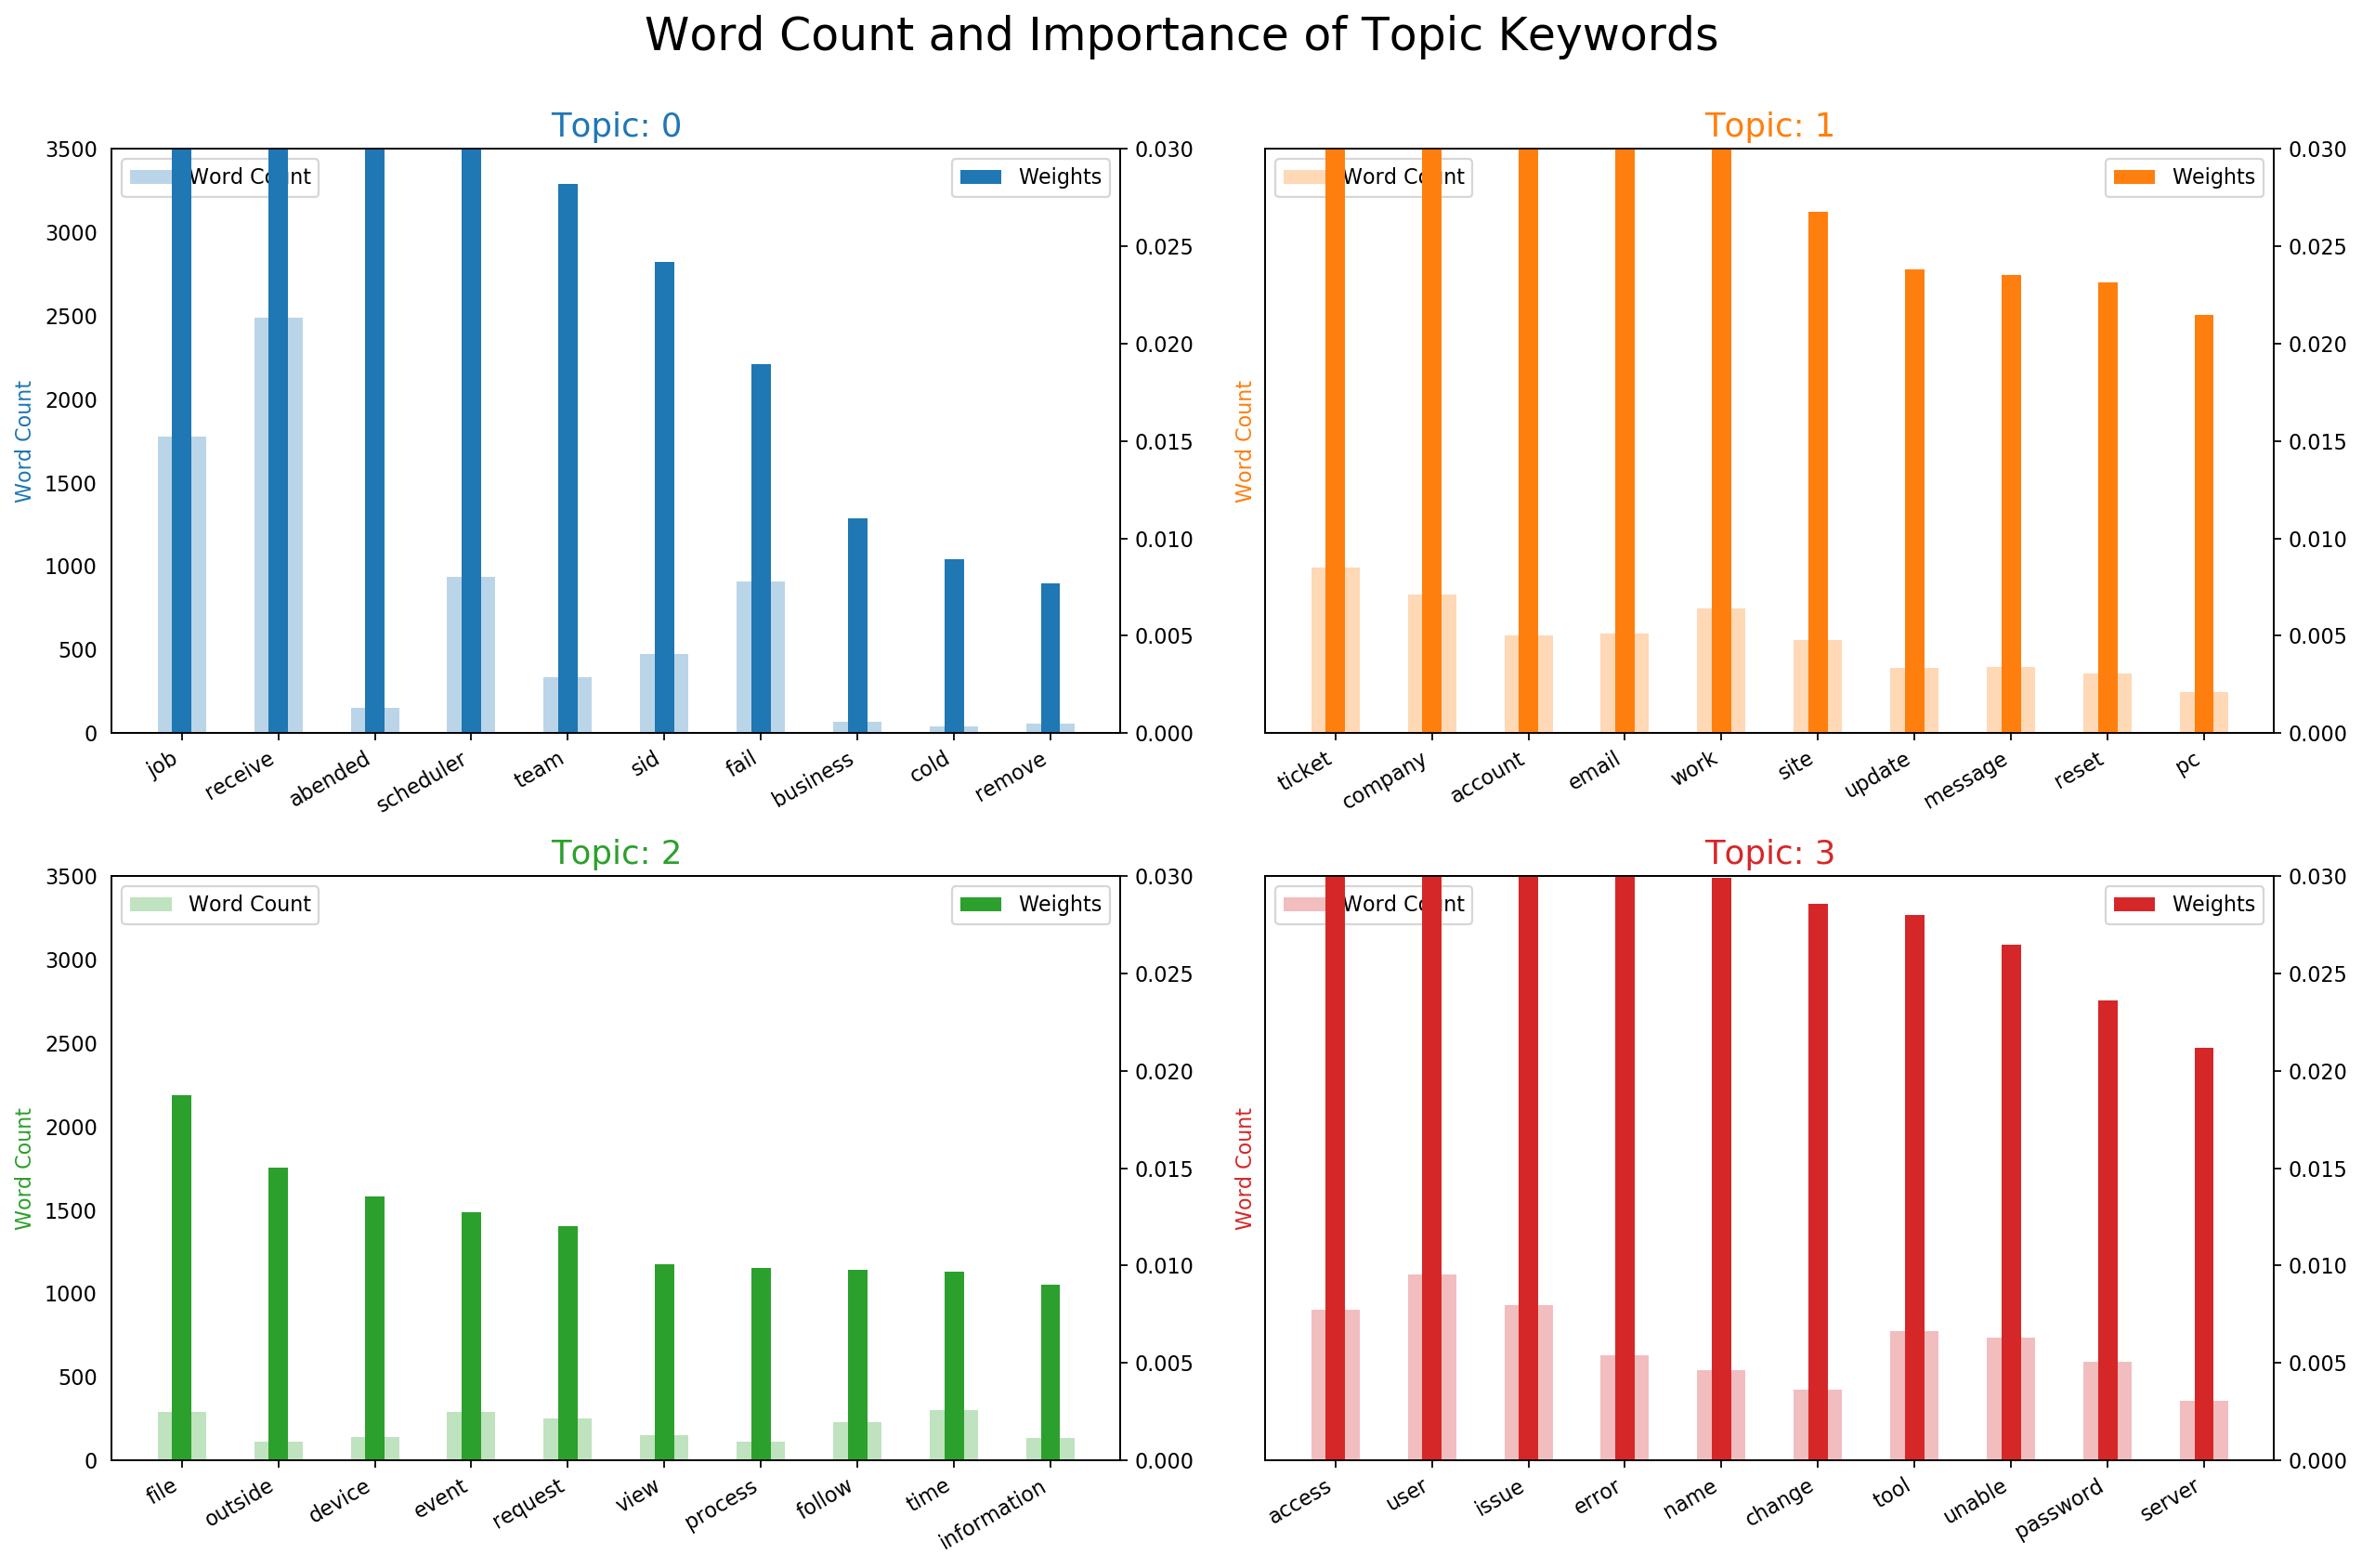

In [45]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Data Cleaning for Model Building

### Choosing description and short description having similarity score greater than 70%

If the similarity score is greater than 0.7 between description and short description, then short description will be used for analysis, else both will be appended

Further, on manual analysis, for descriptions that are related to security and suspicion , the description is the same except the 
attacked IP addresses are mentioned. The length of such descriptions are long, so instead of using such long descriptions, 
only short description is used for text analysis.

In [27]:
sent_used = []
for index, row in data.iterrows():
    if(row['similarity_score'] >= 0.7):
        sent_used.append(row['Short description'])
    if(row['similarity_score']<0.7):
        sent_used.append(row['Short description'] +" "+row['Description'])
        
data['sent_used'] = sent_used

for index, row in data.iterrows():
    if( 'security' in row['Short description'] or 'suspicion' in row['Short description']):
        row['sent_used'] = row['Short description']
        
data.to_csv('cleaned_data_phase_4_model.csv')

In [3]:
#Reading the excel files into pandas dataframe
data_init = pd.read_csv("cleaned_data_phase_4_model.csv")

In [4]:
#Checking the top 5 records of the dataset
data_init.head(5)

,Unnamed: 0,Short description,Description,Caller,Assignment group,similarity_score,sent_used
0,0,login issue,verified user details employee manager name c...,spxjnwir pjlcoqds,GRP_0,0.287656,login issue verified user details employee man...
1,1,outlook,TAGEMAIL team my meetings skype meetings etc ...,hmjdrvpb komuaywn,GRP_0,0.186811,outlook TAGEMAIL team meetings skype meetings ...
2,2,ca nt log in to vpn,TAGEMAIL can not log on to vpn,eylqgodm ybqkwiam,GRP_0,0.411207,ca nt log vpn TAGEMAIL log vpn
3,3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,1.000000,unable access hr tool page
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,1.000000,skype error


In [5]:
data=data_init.drop(['Short description','Description','Caller'], axis=1)

### Choosing appropriate Assignment group count for model building

In [75]:
df = data['Assignment group'].value_counts()>=25

grp = []
for items in df.iteritems():
    if(items[1]== True):
        grp.append(items[0])


data_group = []
for index, row in data.iterrows():
    if(row['Assignment group'] not in grp):
        data_group.append(np.nan)
    else:
        data_group.append(row['Assignment group'])

data['Assignment group'] = data_group

In [76]:
data = data.dropna()

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(data['sent_used'],data['Assignment group'], test_size = 0.20, stratify=data['Assignment group'])

In [78]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6564,) (6564,)
(1642,) (1642,)


In [79]:
#tf-idf vectorization
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=5000)

In [80]:
X_train_tfidf = tfidf_vect_ngram.fit_transform(X_train)
X_test_tfidf = tfidf_vect_ngram.fit_transform(X_test)

## Model 0 : SVC Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model_0 = SVC()

params = {'C': np.logspace(0.5,.01,10,10), 'kernel': ['linear', 'rbf']}

model = GridSearchCV(model_0, param_grid=params, verbose=5)
model.fit(X_train_tfidf,Y_train)

print("Best Hyper Parameters:\n", model.best_params_)

* We have run this code in google colab and it took approax 8-9 hrs. As a group we have splitted the work. So, we have to merge it. Therefore, it was very tedius to run the code again due to time and space constraint. 

In [81]:
from sklearn.svm import SVC
model_0 = SVC(C= 0.5, kernel= 'linear')
model_0.fit(X_train_tfidf,Y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [82]:
pred = model_0.predict(X_test_tfidf)
#Testing the model on test set
score_0 = accuracy_score(pred, Y_test)
print('Test accuracy:', score_0)

Test accuracy: 0.4835566382460414


In [83]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['SVC'], 'Accuracy': score_0},index={'0'})
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,SVC,0.483557


In [84]:
print(metrics.classification_report(Y_test, pred))

F:\Softwares\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Softwares\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Softwares\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       GRP_0       0.48      1.00      0.65       795
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.00      0.00      0.00        28
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.00      0.00      0.00        52
      GRP_13       0.00      0.00      0.00        29
      GRP_14       0.00      0.00      0.00        24
      GRP_15       0.00      0.00      0.00         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.00      0.00      0.00        16
      GRP_18       0.00      0.00      0.00        18
      GRP_19       0.00      0.00      0.00        43
       GRP_2       0.00      0.00      0.00        48
      GRP_20       0.00      0.00      0.00         7
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         6
      GRP_23       0.00      0.00      0.00         5
      GRP_24       1.00    

In [85]:
vocabSize = 14000
max_len = 200
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(data['sent_used'].values)
X = tokenizer.texts_to_sequences(data['sent_used'].values)
X = pad_sequences(X,max_len)

In [86]:
Y = pd.get_dummies(data['Assignment group']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, stratify=data['Assignment group'])
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6154, 200) (6154, 38)
(2052, 200) (2052, 38)


## Model 1 : Neural Network

In [93]:
#Building the NN model
embed_dim = 64
model_1 = Sequential()
model_1.add(Embedding(vocabSize, embed_dim,input_length = max_len,trainable=True))
model_1.add(Flatten())
model_1.add(Dropout(0.2))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(38,activation='softmax'))
adam = optimizers.Adam(lr=0.01)
model_1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
print(model_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 64)           896000    
_________________________________________________________________
flatten_9 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12800)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                819264    
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 38)                2470      
Total params: 1,717,734
Trainable params: 1,717,734
Non-trainable params: 0
_________________________________________________________________


In [94]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('nn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [95]:
#Training the model on Train set
history = model_1.fit(X_train, Y_train, batch_size=32, epochs=20,verbose=2, validation_split=0.02,callbacks=[early_stopping,model_checkpoint])

Train on 6030 samples, validate on 124 samples
Epoch 1/20
 - 4s - loss: 1.9480 - acc: 0.5665 - val_loss: 1.7948 - val_acc: 0.5806

Epoch 00001: val_loss improved from inf to 1.79476, saving model to nn_checkpoint_01_loss1.7948.h5
Epoch 2/20
 - 3s - loss: 1.3831 - acc: 0.6406 - val_loss: 1.8680 - val_acc: 0.5968

Epoch 00002: val_loss did not improve from 1.79476
Epoch 3/20
 - 3s - loss: 1.1326 - acc: 0.6968 - val_loss: 2.0344 - val_acc: 0.5645

Epoch 00003: val_loss did not improve from 1.79476
Epoch 4/20
 - 3s - loss: 1.0330 - acc: 0.7154 - val_loss: 2.1754 - val_acc: 0.5645

Epoch 00004: val_loss did not improve from 1.79476
Epoch 5/20
 - 3s - loss: 1.0202 - acc: 0.7297 - val_loss: 2.1016 - val_acc: 0.5565

Epoch 00005: val_loss did not improve from 1.79476
Epoch 6/20
 - 3s - loss: 1.0001 - acc: 0.7504 - val_loss: 2.6295 - val_acc: 0.5726

Epoch 00006: val_loss did not improve from 1.79476


In [100]:
#Testing the model on test set
score_1 = model_1.evaluate(X_test, Y_test)

2052/2052 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 105us/step
Test loss:2.115766069577684
Test accuracy:0.601364522417154


In [102]:
print('Test loss: '+ str(score_1[0]))
print('Test accuracy: '+ str(score_1[1]))

Test loss: 2.115766069577684
Test accuracy: 0.601364522417154


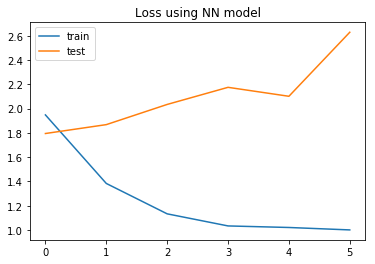

In [103]:
plt.title('Loss using NN model')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

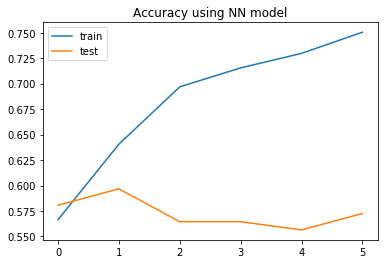

In [104]:
plt.title('Accuracy using NN model')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [105]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN Model'], 'Accuracy': [score_1[1]]},index={'1'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,SVC,0.483557
1,NN Model,0.601365


## Model 2 : CNN

In [107]:
#Building the CNN model
model_2 = Sequential()
model_2.add(Embedding(vocabSize, embed_dim,input_length = max_len,trainable=True))
model_2.add(Conv1D(128, 5, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dropout(0.2))
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(38,activation='softmax'))
adam = optimizers.Adam(lr=0.01)
model_2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 200, 64)           896000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 196, 128)          41088     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 38)                9766      
Total para

In [108]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [109]:
#Training the model on Train set
history = model_2.fit(X_train, Y_train, batch_size=32, epochs=20,verbose=2, validation_split=0.01,callbacks=[early_stopping,model_checkpoint])

Train on 6092 samples, validate on 62 samples
Epoch 1/20
 - 10s - loss: 1.8526 - acc: 0.5698 - val_loss: 1.3650 - val_acc: 0.6452

Epoch 00001: val_loss improved from inf to 1.36499, saving model to cnn_checkpoint_01_loss1.3650.h5
Epoch 2/20
 - 4s - loss: 1.4231 - acc: 0.6293 - val_loss: 1.3972 - val_acc: 0.7097

Epoch 00002: val_loss did not improve from 1.36499
Epoch 3/20
 - 4s - loss: 1.2833 - acc: 0.6559 - val_loss: 1.2559 - val_acc: 0.6774

Epoch 00003: val_loss improved from 1.36499 to 1.25593, saving model to cnn_checkpoint_03_loss1.2559.h5
Epoch 4/20
 - 4s - loss: 1.2277 - acc: 0.6701 - val_loss: 1.3543 - val_acc: 0.6935

Epoch 00004: val_loss did not improve from 1.25593
Epoch 5/20
 - 4s - loss: 1.1812 - acc: 0.6832 - val_loss: 1.3822 - val_acc: 0.6935

Epoch 00005: val_loss did not improve from 1.25593
Epoch 6/20
 - 4s - loss: 1.1954 - acc: 0.6947 - val_loss: 1.5083 - val_acc: 0.6935

Epoch 00006: val_loss did not improve from 1.25593
Epoch 7/20
 - 4s - loss: 1.1409 - acc: 0.

In [113]:
#Testing the model on test set
score_2 = model_2.evaluate(X_test, Y_test)

2052/2052 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 97us/step


In [114]:
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 2.0426149570453935
Test accuracy: 0.6301169590643275


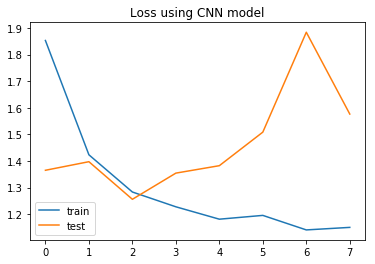

In [115]:
plt.title('Loss using CNN model')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

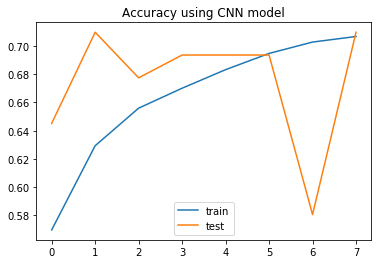

In [116]:
plt.title('Accuracy using CNN model')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [117]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['CNN Model'], 'Accuracy': [score_2[1]]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,SVC,0.483557
1,NN Model,0.601365
2,CNN Model,0.630117


## Model 3 : LSTM Model - 1

In [119]:
embed_dim = 64
lstm_out = 128

model_3 = Sequential()
model_3.add(Embedding(vocabSize, embed_dim,input_length = max_len,trainable=True))
model_3.add(LSTM(lstm_out,dropout=0.2,recurrent_dropout=0.2))
model_3.add(Dense(38,activation='softmax'))
adam = optimizers.Adam(lr=0.01)
model_3.compile(loss = 'categorical_crossentropy', optimizer=adam,metrics = ['accuracy'])
print(model_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 64)           896000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_26 (Dense)             (None, 38)                4902      
Total params: 999,718
Trainable params: 999,718
Non-trainable params: 0
_________________________________________________________________
None


In [120]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('lstm_1_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [121]:
#Training the model on Train set
history = model_3.fit(X_train, Y_train, batch_size=32, epochs=20,verbose=2, validation_split=0.01,callbacks=[early_stopping,model_checkpoint])

Train on 6092 samples, validate on 62 samples
Epoch 1/20
 - 148s - loss: 1.8389 - acc: 0.5701 - val_loss: 1.5716 - val_acc: 0.6452

Epoch 00001: val_loss improved from inf to 1.57163, saving model to lstm_1_checkpoint_01_loss1.5716.h5
Epoch 2/20
 - 138s - loss: 1.3162 - acc: 0.6499 - val_loss: 1.4361 - val_acc: 0.6774

Epoch 00002: val_loss improved from 1.57163 to 1.43605, saving model to lstm_1_checkpoint_02_loss1.4361.h5
Epoch 3/20
 - 146s - loss: 0.9985 - acc: 0.7162 - val_loss: 1.4660 - val_acc: 0.6613

Epoch 00003: val_loss did not improve from 1.43605
Epoch 4/20
 - 130s - loss: 0.7743 - acc: 0.7731 - val_loss: 1.4595 - val_acc: 0.6935

Epoch 00004: val_loss did not improve from 1.43605
Epoch 5/20
 - 137s - loss: 0.6173 - acc: 0.8129 - val_loss: 1.5500 - val_acc: 0.7419

Epoch 00005: val_loss did not improve from 1.43605
Epoch 6/20
 - 144s - loss: 0.5129 - acc: 0.8477 - val_loss: 1.7468 - val_acc: 0.6129

Epoch 00006: val_loss did not improve from 1.43605
Epoch 7/20
 - 144s - los

In [122]:
#Testing the model on test set
score_3 = model_3.evaluate(X_test, Y_test)

2052/2052 [==============================] - ETA: 31 - ETA: 24 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 21s 10ms/step


In [123]:
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

Test loss: 1.8245174050563493
Test accuracy: 0.6003898635477583


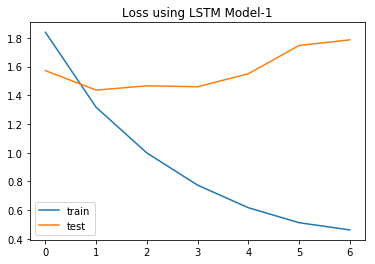

In [124]:
plt.title('Loss using LSTM Model-1')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

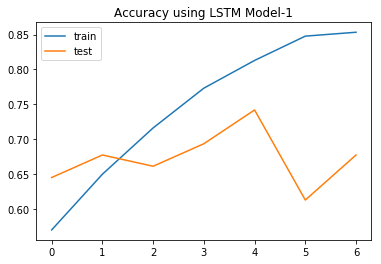

In [125]:
plt.title('Accuracy using LSTM Model-1')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [126]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LSTM Model-1'], 'Accuracy': [score_3[1]]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,SVC,0.483557
1,NN Model,0.601365
2,CNN Model,0.630117
3,LSTM Model-1,0.600390


## Model 4 : LSTM Model - 2

In [128]:
#Building the LSTM model-2

embed_dim = 64
lstm_out = 128

model_4 = Sequential()
model_4.add(Embedding(vocabSize, embed_dim,input_length = max_len,trainable=True))
model_4.add(LSTM(lstm_out))
model_4.add(Dropout(0.2))
model_4.add(Dense(256,activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(38,activation='softmax'))
adam = optimizers.Adam(lr=0.01)
model_4.compile(loss = 'categorical_crossentropy', optimizer=adam,metrics = ['accuracy'])
print(model_4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 200, 64)           896000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 38)                9766      
Total params: 1,037,606
Trainable params: 1,037,606
Non-trainable params: 0
_________________________________________________________________


In [129]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('lstm_2_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [130]:
#Training the model on Train set
history = model_4.fit(X_train, Y_train, batch_size=32, epochs=20,verbose=2, validation_split=0.01,callbacks=[early_stopping,model_checkpoint])

Train on 6092 samples, validate on 62 samples
Epoch 1/20
 - 128s - loss: 1.9265 - acc: 0.5680 - val_loss: 1.7694 - val_acc: 0.6129

Epoch 00001: val_loss improved from inf to 1.76941, saving model to lstm_2_checkpoint_01_loss1.7694.h5
Epoch 2/20
 - 125s - loss: 1.4549 - acc: 0.6244 - val_loss: 1.6763 - val_acc: 0.5968

Epoch 00002: val_loss improved from 1.76941 to 1.67635, saving model to lstm_2_checkpoint_02_loss1.6763.h5
Epoch 3/20
 - 125s - loss: 1.2017 - acc: 0.6638 - val_loss: 1.6428 - val_acc: 0.6774

Epoch 00003: val_loss improved from 1.67635 to 1.64281, saving model to lstm_2_checkpoint_03_loss1.6428.h5
Epoch 4/20
 - 123s - loss: 1.0012 - acc: 0.7024 - val_loss: 1.8782 - val_acc: 0.6613

Epoch 00004: val_loss did not improve from 1.64281
Epoch 5/20
 - 119s - loss: 0.8957 - acc: 0.7336 - val_loss: 1.9109 - val_acc: 0.6452

Epoch 00005: val_loss did not improve from 1.64281
Epoch 6/20
 - 124s - loss: 0.7639 - acc: 0.7733 - val_loss: 1.6772 - val_acc: 0.7097

Epoch 00006: val_lo

In [131]:
#Testing the model on test set
score_4 = model_4.evaluate(X_test, Y_test)


2052/2052 [==============================] - ETA: 20 - ETA: 14 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 8s 4ms/step
Test loss: 2.288032783634714
Test accuracy: 0.5721247563352827


In [132]:
print('Test loss:', score_4[0])
print('Test accuracy:', score_4[1])

Test loss: 2.288032783634714
Test accuracy: 0.5721247563352827


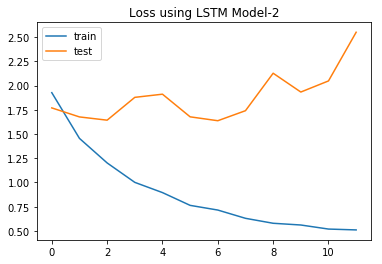

In [133]:
plt.title('Loss using LSTM Model-2')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

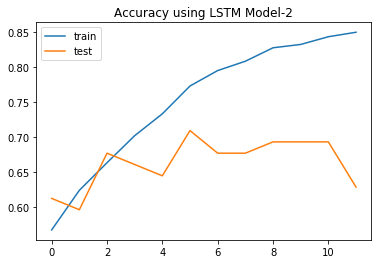

In [134]:
plt.title('Accuracy using LSTM Model-2')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [135]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LSTM Model-2'], 'Accuracy': [score_4[1]]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,SVC,0.483557
1,NN Model,0.601365
2,CNN Model,0.630117
3,LSTM Model-1,0.600390
4,LSTM Model-2,0.572125


In [136]:
#Building the model
model_5 = Sequential()
model_5.add(Embedding(vocabSize, embed_dim,input_length = max_len,trainable=True))
model_5.add(GRU(128))
model_4.add(Dropout(0.2))
model_5.add(Dense(38,activation='softmax'))
adam = optimizers.Adam(lr=0.01)
model_5.compile(loss = 'categorical_crossentropy', optimizer=adam,metrics = ['accuracy'])
print(model_5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 200, 64)           896000    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               74112     
_________________________________________________________________
dense_31 (Dense)             (None, 38)                4902      
Total params: 975,014
Trainable params: 975,014
Non-trainable params: 0
_________________________________________________________________
None


In [137]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('gru_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [138]:
#Training the model on Train set
history = model_5.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.01,callbacks=[early_stopping,model_checkpoint])

Train on 6092 samples, validate on 62 samples
Epoch 1/20
 - 47s - loss: 1.7542 - acc: 0.5911 - val_loss: 1.5020 - val_acc: 0.6935

Epoch 00001: val_loss improved from inf to 1.50195, saving model to gru_checkpoint_01_loss1.5020.h5
Epoch 2/20
 - 45s - loss: 1.0618 - acc: 0.7044 - val_loss: 1.4768 - val_acc: 0.6935

Epoch 00002: val_loss improved from 1.50195 to 1.47676, saving model to gru_checkpoint_02_loss1.4768.h5
Epoch 3/20
 - 45s - loss: 0.6691 - acc: 0.8032 - val_loss: 1.8207 - val_acc: 0.7419

Epoch 00003: val_loss did not improve from 1.47676
Epoch 4/20
 - 46s - loss: 0.4863 - acc: 0.8587 - val_loss: 1.7780 - val_acc: 0.6935

Epoch 00004: val_loss did not improve from 1.47676
Epoch 5/20
 - 45s - loss: 0.4644 - acc: 0.8621 - val_loss: 2.2921 - val_acc: 0.6613

Epoch 00005: val_loss did not improve from 1.47676
Epoch 6/20
 - 46s - loss: 1.4636 - acc: 0.6533 - val_loss: 2.5366 - val_acc: 0.5161

Epoch 00006: val_loss did not improve from 1.47676
Epoch 7/20
 - 45s - loss: 1.7122 - a

In [140]:
#Testing the model on test set
score_5 = model_5.evaluate(X_test, Y_test)

2052/2052 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 7s 3ms/step


In [141]:
print('Test loss:', score_5[0])
print('Test accuracy:', score_5[1])

Test loss: 2.233296069485402
Test accuracy: 0.5375243664717348


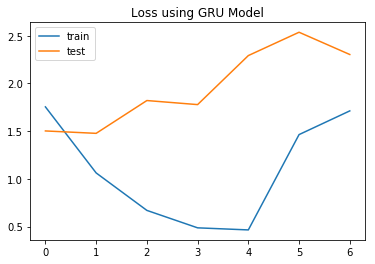

In [142]:
plt.title('Loss using GRU Model')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

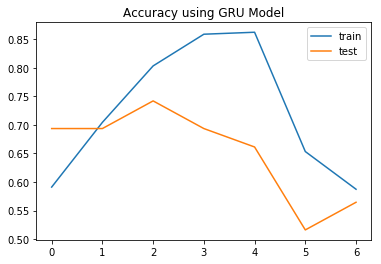

In [143]:
plt.title('Accuracy using GRU Model')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [144]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['GRU Model'], 'Accuracy': [score_5[1]]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,SVC,0.483557
1,NN Model,0.601365
2,CNN Model,0.630117
3,LSTM Model-1,0.600390
4,LSTM Model-2,0.572125
5,GRU Model,0.537524


* We can clearly see CNN model is performing well as compared to other models.